# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [2]:
apple = pd.read_csv('appl_1980_2014.csv')

### Step 4.  Check out the type of the columns

In [3]:
print("\nColumn types:\n", apple.dtypes)


Column types:
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


### Step 5. Transform the Date column as a datetime type

In [4]:
apple['Date'] = pd.to_datetime(apple['Date'])

### Step 6.  Set the date as the index

In [5]:
apple.set_index('Date', inplace=True)

### Step 7.  Is there any duplicate dates?

In [6]:
duplicates = apple.index.duplicated()

if duplicates.any():
    print("Duplicate dates found:")
    print(apple[duplicates])
else:
    print("No duplicate dates found.")

No duplicate dates found.


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [7]:
apple.sort_index(inplace=True)

### Step 9. Get the last business day of each month

In [8]:
month_end_dates = pd.date_range(start=apple.index.min(), end=apple.index.max(), freq='BM')

last_business_days = []
for end_date in month_end_dates:
    last_business_day = pd.date_range(end=end_date, periods=1, freq='B').max()
    last_business_days.append(last_business_day)

last_business_days_df = pd.DataFrame(last_business_days, columns=['Last Business Day'])

print(last_business_days_df)

    Last Business Day
0          1980-12-31
1          1981-01-30
2          1981-02-27
3          1981-03-31
4          1981-04-30
..                ...
398        2014-02-28
399        2014-03-31
400        2014-04-30
401        2014-05-30
402        2014-06-30

[403 rows x 1 columns]


### Step 10.  What is the difference in days between the first day and the oldest

In [10]:
first_day = apple.index.min()
oldest_date = apple.index.max()

difference_in_days = (oldest_date - first_day).days

print("Difference in days between the first day and the oldest date:", difference_in_days)

Difference in days between the first day and the oldest date: 12261


### Step 11.  How many months in the data we have?

In [11]:
months_years = apple.index.to_period('M')

unique_months_years = months_years.unique()

num_months = len(unique_months_years)

print("Number of months in the data:", num_months)

Number of months in the data: 404


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

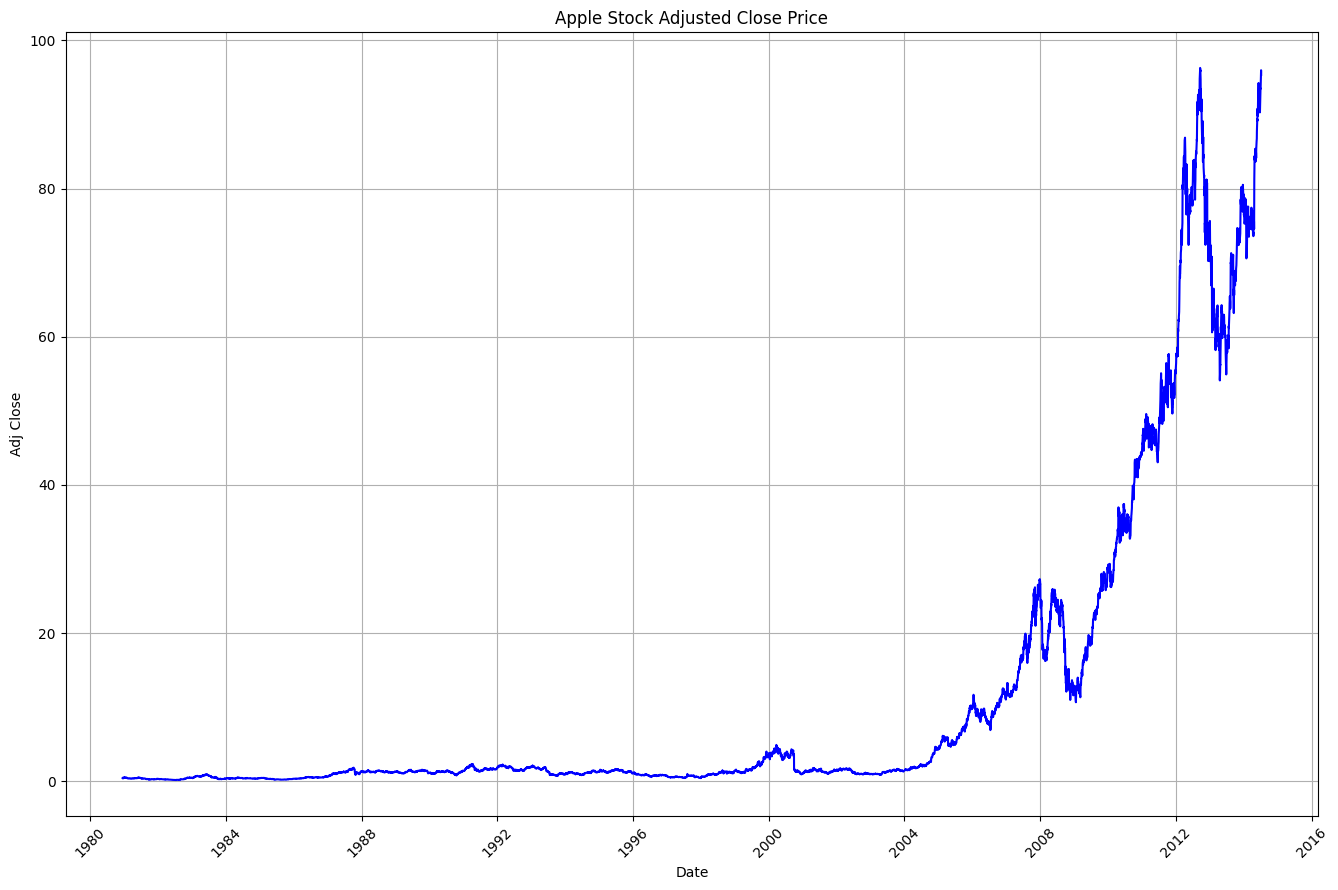

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13.5, 9))

plt.plot(apple.index, apple['Adj Close'], color='blue', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Apple Stock Adjusted Close Price')

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

### BONUS: Create your own question and answer it.